Import, inspect and transform data

In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [249]:
data = pd.read_csv("Data/digit-recognizer/train.csv")

In [250]:
data.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

In [251]:
data["label"].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [258]:
y = data["label"]
y = y.values
y

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [259]:
X = data.drop(columns={"label"})
X = X.values
X.shape
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [267]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif
X_new = SelectPercentile(score_func=f_classif, percentile=80).fit_transform(X, y)

C:\Users\jwr19\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [  0   1   2   3   4   5   6   7   8   9  10  11  16  17  18  19  20  21
  22  23  24  25  26  27  28  29  30  31  52  53  54  55  56  57  82  83
  84  85 111 112 139 140 141 168 196 392 420 421 448 476 532 560 644 645
 671 672 673 699 700 701 727 728 729 730 731 754 755 756 757 758 759 760
 780 781 782 783] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\jwr19\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [268]:
X_new.shape

(42000, 627)

In [269]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    stratify=y)

In [242]:
from sklearn import preprocessing
scaler = preprocessing.MaxAbsScaler().fit(X_train)
scaler

MaxAbsScaler()

In [243]:
X_train_minmax = scaler.transform(X_train)
scaler_2 = preprocessing.Binarizer().fit(X_train_minmax)

In [244]:
X_train_binarized = scaler_2.transform(X_train_minmax)

In [245]:
X_image = X_train_binarized[:100].reshape(100,28,28)

In [246]:
y_train[:10]

array([4, 2, 5, 8, 3, 0, 0, 0, 2, 7], dtype=int8)

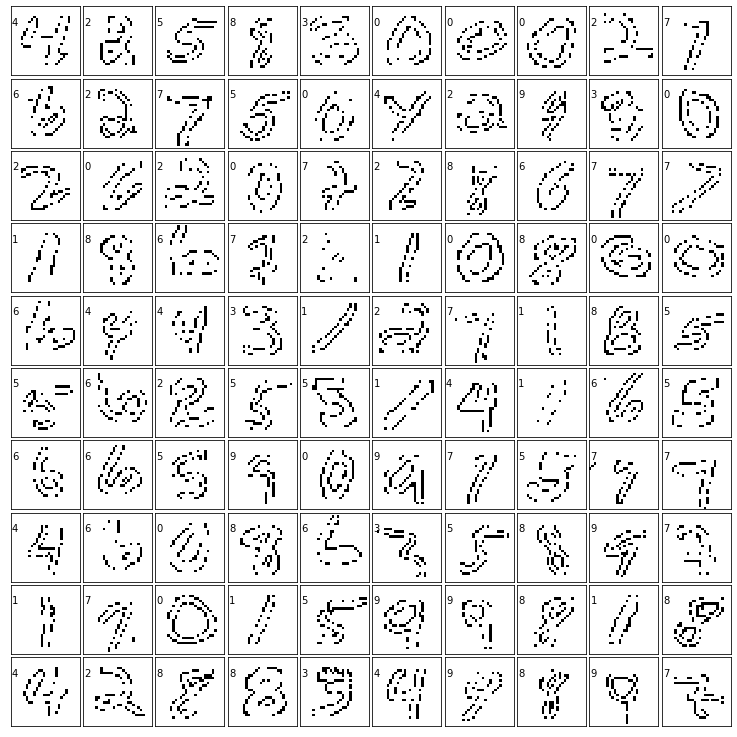

In [247]:
# set up the figure
fig = plt.figure(figsize=(10, 10))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 28x28 pixels
for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(X_image[i], cmap=plt.cm.Greys, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(y_train[i]))

Split data into test and train

In [216]:
X_test_discretized = scaler.transform(X_test)

In [217]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix

bnb = BernoulliNB()

bnb.fit(X_train_discretized, y_train)

y_pred = bnb.fit(X_train_discretized, y_train).predict(X_test_discretized)

print("Number of mislabeled points out of a total %d points : %d" % (X_test_discretized.shape[0], (y_test != y_pred).sum()))




Number of mislabeled points out of a total 10500 points : 1783
Confusion matrix:
[[ 929    0    6    3    0   41   28    0   23    3]
 [   0 1117    6    5    0   18    4    1   20    0]
 [  13   21  849   41   20    8   40    9   41    2]
 [   8   23   48  869    7   27   13    5   64   24]
 [   3   11    5    0  789    6   11    3   16  174]
 [  21   12    8  111   36  675   17    6   29   34]
 [  11   22   13    0    8   35  936    0    9    0]
 [   2   19   10    4   29    1    1  935   20   79]
 [   9   59   11   69   10   37    7    6  767   41]
 [   9   19    6    9   77    9    0   39   28  851]]


In [219]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=10000)

classifier.fit(X_train_discretized, y_train)

prediction = classifier.predict(X_test_discretized)

np.mean(prediction == y_test)

from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, prediction)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[ 984    0    6    2    3   12   17    1    7    1]
 [   0 1138    4    5    0    5    1    3   14    1]
 [   4   17  928   18   16   12   14   11   21    3]
 [   4    6   28  945    1   53    2    9   28   12]
 [   0    4   11    0  923    5    8    6   11   50]
 [  10   12   10   41   15  798   16    4   31   12]
 [  10    1    8    2    9   15  982    0    6    1]
 [   1    7   10    6   11    0    1 1023    4   37]
 [  10   28   19   29    7   31   14    3  853   22]
 [   6    6    3   12   41   12    0   42    8  917]]


In [221]:
classifier.score(X_test_discretized, y_test)

0.9039047619047619

In [222]:
classifier.n_iter_

array([6040])